In [ ]:
!pip install -U openmim
!mim install mmengine
!mim install 'mmcv>=2.0.0rc1'
!mim install 'mmdet>=3.0.0rc0'

In [ ]:
# !git clone https://github.com/open-mmlab/mmocr.git
!git clone https://github.com/PaulowniaTree/mini_project_4.git
%cd mini_project_4
!git checkout mmocr_custom
%cd mmocr_custom
!pip install -v -e .
# "-v" increases pip's verbosity.
# "-e" means installing the project in editable mode,
# That is, any local modifications on the code will take effect immediately.

In [3]:
from mmocr.datasets import OCRDataset
from mmengine.registry import init_default_scope
from mmocr.apis import MMOCRInferencer
from mmengine.runner import Runner
import time
import mmcv
import matplotlib.pyplot as plt
from mmengine.runner import Runner
from mmengine import Config
from mmocr.apis import MMOCRInferencer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_root = '/content/drive/MyDrive/Colab Notebooks/'

In [5]:
root = '/content/mini_project_4/'
# data_root = root

## Config 수정

In [ ]:
%cd /content/mini_project_4/mmocr_custom/projects/ABCNet
cfg = Config.fromfile('config/abcnet/abcnet_resnet50_fpn_500e_icdar2015.py')

In [7]:
cfg.keys()

dict_keys(['num_classes', 'strides', 'bbox_coder', 'with_bezier', 'norm_on_bbox', 'use_sigmoid_cls', 'dictionary', 'model', 'test_pipeline', 'train_pipeline', 'icdar2015_textspotting_data_root', 'icdar2015_textspotting_train', 'icdar2015_textspotting_test', 'default_scope', 'env_cfg', 'randomness', 'default_hooks', 'log_level', 'log_processor', 'load_from', 'resume', 'val_evaluator', 'test_evaluator', 'vis_backends', 'visualizer', 'optim_wrapper', 'train_cfg', 'val_cfg', 'test_cfg', 'param_scheduler', 'train_dataloader', 'val_dataloader', 'test_dataloader', 'custom_imports', 'find_unused_parameters'])

In [8]:
cfg.train_dataloader.num_workers = 1
cfg.val_dataloader.num_workers = 1
cfg.test_dataloader.num_workers = 1

cfg.work_dir = 'work_dirs/test1/'
cfg.dictionary = root+'mmocr_custom/dicts/kor_digits.txt'
cfg.model.roi_head.rec_head.decoder.dictionary.dict_file = root+'mmocr_custom/dicts/kor_digits.txt'

cfg.train_cfg.max_epochs=1
cfg.train_cfg.val_interval=1

cfg.icdar2015_textspotting_data_root = data_root+'Temp/temp_Sign'
cfg.icdar2015_textspotting_train.data_root = data_root+'Temp/temp_Sign'
cfg.icdar2015_textspotting_train.ann_file = data_root+'Temp/spot_train_annotation.json'
cfg.icdar2015_textspotting_test.data_root = data_root+'Temp/temp_Sign'
cfg.icdar2015_textspotting_test.ann_file = data_root+'Temp/spot_test_annotation.json'

cfg.train_dataloader.batch_size=1
cfg.train_dataloader.dataset.data_root = data_root+'Temp/temp_Sign'
cfg.train_dataloader.dataset.ann_file = data_root+'Temp/spot_train_annotation.json'

cfg.val_dataloader.batch_size=1
cfg.val_dataloader.dataset.data_root = data_root+'Temp/temp_Sign'
cfg.val_dataloader.dataset.ann_file = data_root+'Temp/spot_test_annotation.json'

cfg.test_dataloader.batch_size=1
cfg.test_dataloader.dataset.data_root = data_root+'Temp/temp_Sign'
cfg.test_dataloader.dataset.ann_file = data_root+'Temp/spot_test_annotation.json'

## 모델 훈련

In [15]:
cfg.visualizer.name = f'{time.localtime()}'
runner = Runner.from_cfg(cfg)

05/18 18:44:56 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 1259500699
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50

In [16]:
runner.train()

05/18 18:45:15 - mmengine - INFO - load model from: open-mmlab://detectron2/resnet50_caffe
05/18 18:45:15 - mmengine - INFO - Loads checkpoint by openmmlab backend from path: open-mmlab://detectron2/resnet50_caffe


Downloading: "https://download.openmmlab.com/pretrain/third_party/resnet50_msra-5891d200.pth" to /root/.cache/torch/hub/checkpoints/resnet50_msra-5891d200.pth


05/18 18:45:26 - mmengine - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: conv1.bias

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textspotting/abcnet/abcnet_resnet50_fpn_500e_icdar2015/abcnet_resnet50_fpn_pretrain-d060636c.pth


Downloading: "https://download.openmmlab.com/mmocr/textspotting/abcnet/abcnet_resnet50_fpn_500e_icdar2015/abcnet_resnet50_fpn_pretrain-d060636c.pth" to /root/.cache/torch/hub/checkpoints/abcnet_resnet50_fpn_pretrain-d060636c.pth


The model and loaded state dict do not match exactly

size mismatch for roi_head.rec_head.decoder.embedding.weight: copying a param with shape torch.Size([97, 256]) from checkpoint, the shape in current model is torch.Size([1009, 256]).
size mismatch for roi_head.rec_head.decoder.out.weight: copying a param with shape torch.Size([97, 256]) from checkpoint, the shape in current model is torch.Size([1009, 256]).
size mismatch for roi_head.rec_head.decoder.out.bias: copying a param with shape torch.Size([97]) from checkpoint, the shape in current model is torch.Size([1009]).
missing keys in source state_dict: det_head.scales.0.scale, det_head.scales.1.scale, det_head.scales.2.scale, det_head.scales.3.scale, det_head.scales.4.scale

05/18 18:45:41 - mmengine - INFO - Load checkpoint from https://download.openmmlab.com/mmocr/textspotting/abcnet/abcnet_resnet50_fpn_500e_icdar2015/abcnet_resnet50_fpn_pretrain-d060636c.pth
05/18 18:45:41 - mmengine - WARNING - "FileClient" will be deprecated i

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


05/18 18:45:52 - mmengine - INFO - Epoch(train) [1][  5/800]  lr: 5.0000e-06  eta: 0:28:13  time: 2.1297  data_time: 0.1387  memory: 4833  loss: 66.6019  loss_cls: 0.6990  loss_bbox: 0.1531  loss_centerness: 0.6096  loss_bezier: 57.9883  loss_ce: 7.1519
05/18 18:45:56 - mmengine - INFO - Epoch(train) [1][ 10/800]  lr: 1.0000e-05  eta: 0:18:54  time: 1.4366  data_time: 0.0730  memory: 4150  loss: 64.5844  loss_cls: 0.6772  loss_bbox: 0.1744  loss_centerness: 0.6153  loss_bezier: 55.9670  loss_ce: 7.1505
05/18 18:46:00 - mmengine - INFO - Epoch(train) [1][ 15/800]  lr: 1.5000e-05  eta: 0:16:14  time: 0.7975  data_time: 0.0082  memory: 5555  loss: 83.9611  loss_cls: 0.5833  loss_bbox: 0.1577  loss_centerness: 0.6143  loss_bezier: 75.4586  loss_ce: 7.1472
05/18 18:46:04 - mmengine - INFO - Epoch(train) [1][ 20/800]  lr: 2.0000e-05  eta: 0:14:31  time: 0.7972  data_time: 0.0084  memory: 5623  loss: 91.6519  loss_cls: 0.6375  loss_bbox: 0.1570  loss_centerness: 0.6184  loss_bezier: 83.1145  

ABCNet(
  (data_preprocessor): TextDetDataPreprocessor()
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=Tru

## 모델 예측

In [17]:
runner.test()

05/18 19:01:05 - mmengine - INFO - Epoch(test) [  5/200]    eta: 0:02:26  time: 0.7499  data_time: 0.0694  memory: 2685  
05/18 19:01:09 - mmengine - INFO - Epoch(test) [ 10/200]    eta: 0:02:16  time: 0.7175  data_time: 0.0399  memory: 2685  
05/18 19:01:12 - mmengine - INFO - Epoch(test) [ 15/200]    eta: 0:02:07  time: 0.6583  data_time: 0.0091  memory: 2302  
05/18 19:01:15 - mmengine - INFO - Epoch(test) [ 20/200]    eta: 0:02:03  time: 0.6578  data_time: 0.0080  memory: 2834  
05/18 19:01:19 - mmengine - INFO - Epoch(test) [ 25/200]    eta: 0:02:01  time: 0.7023  data_time: 0.0085  memory: 2685  
05/18 19:01:22 - mmengine - INFO - Epoch(test) [ 30/200]    eta: 0:01:57  time: 0.7041  data_time: 0.0097  memory: 2685  
05/18 19:01:26 - mmengine - INFO - Epoch(test) [ 35/200]    eta: 0:01:54  time: 0.7004  data_time: 0.0139  memory: 2876  
05/18 19:01:30 - mmengine - INFO - Epoch(test) [ 40/200]    eta: 0:01:52  time: 0.7207  data_time: 0.0125  memory: 2685  
05/18 19:01:33 - mmengin

{'e2e_icdar/precision': 0.0,
 'e2e_icdar/recall': 0.0,
 'e2e_icdar/hmean': 0.0,
 'icdar/precision': 0.0,
 'icdar/recall': 0.0,
 'icdar/hmean': 0.0}

Loads checkpoint by local backend from path: /content/mini_project_4/mmocr_custom/projects/ABCNet/work_dirs/test1/epoch_1.pth


Output()

result: [{'polygons': [], 'bboxes': [], 'scores': [], 'texts': []}]


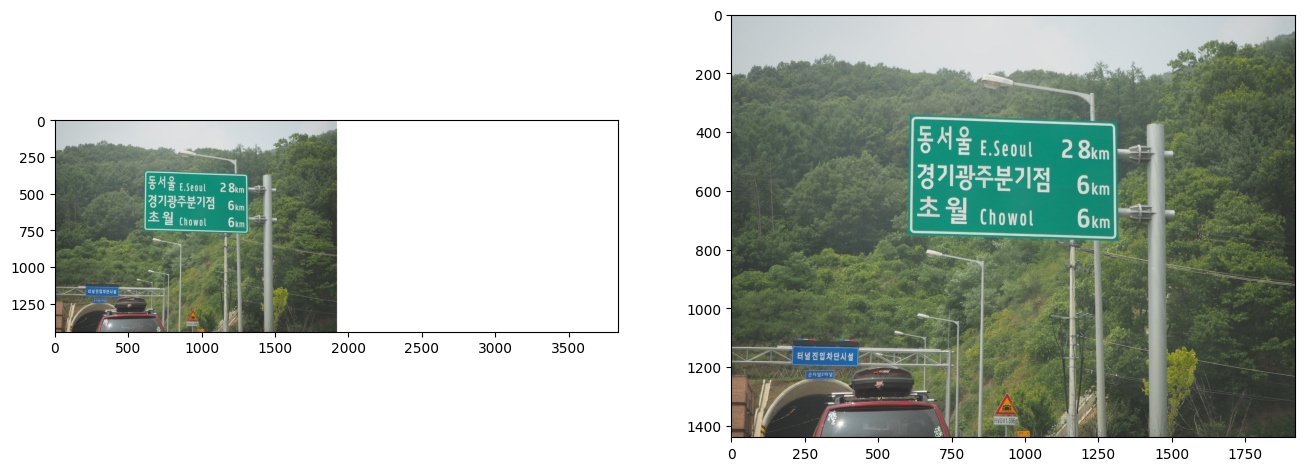

In [19]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from mmocr.apis import TextSpotInferencer

img = data_root + 'Temp/temp_Sign/000D6985A1C98F0549F53FEE4FA556B8.jpg'
checkpoint = '/content/mini_project_4/mmocr_custom/projects/ABCNet/work_dirs/test1/epoch_1.pth'
# cfg_file = '/content/mmocr/configs/textdet/dbnet/dbnet_resnet50-dcnv2_fpnc_1200e_icdar2015.py'

infer = TextSpotInferencer(cfg, checkpoint)
result = infer(img, return_vis=True, save_vis=True)

print(f'result: {result["predictions"]}' )

fig, ax = plt.subplots(1,2,figsize=(16,10))
ax[0].imshow(result['visualization'][0])
img = cv2.imread(img)
ax[1].imshow(np.asarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)))
plt.show()